In [1]:
from rubin_scheduler.site_models import _read_fields, read_fields
import numpy as np
import healpy as hp
%matplotlib inline
from rubin_scheduler.scheduler.utils import ObservationArray
from rubin_scheduler.scheduler.features import NObservations
from rubin_scheduler.scheduler.utils import HpInLsstFov
from rubin_sim import maf
import matplotlib.pylab as plt

In [2]:
ra,dec = read_fields()

In [3]:
obs = ObservationArray(n=ra.size)

In [4]:
obs['RA'] = ra
obs['dec'] = dec


names = ['fieldRA', 'fieldDec', 'night', 'rotSkyPos']
types = [float, float, int, float]
data = np.zeros(obs.size, dtype=list(zip(names,types)))

data['fieldRA'] = obs['RA']
data['fieldDec'] = obs['dec']



In [5]:
bundle_list = []

# col here could be anything
metric = maf.metrics.CountMetric(col=['night'], metric_name='Nvis')
# Select all the visits. Could do something like 'filter="r"' 
sql = ''
slicer = maf.slicers.HealpixSlicer(use_camera=False, radius=1.75)
plot_dict = {}
bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name='', plot_dict=plot_dict))




Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [6]:
bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, '', out_dir='temp', results_db=None)

bg.run_current('', sim_data=data)
# bg.plot_all(closefigs=False)


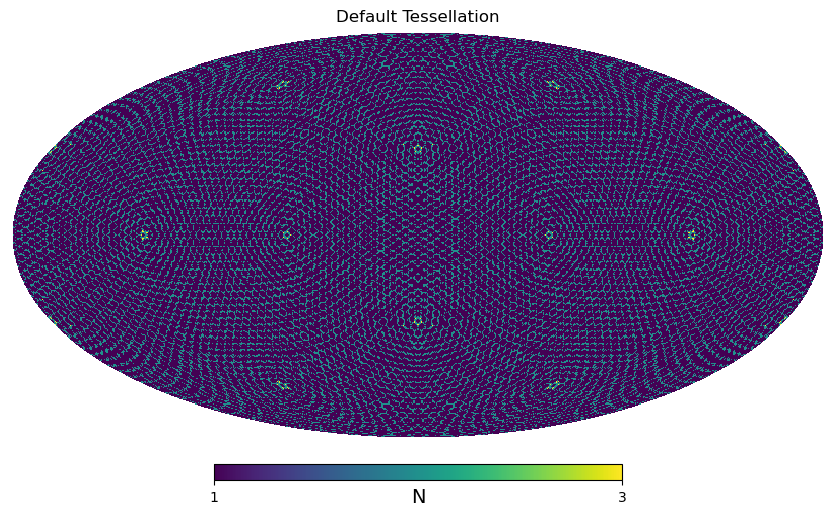

In [7]:
hp.mollview(bundle_list[0].metric_values, title='Default Tessellation', unit='N')

In [9]:
ra.size

5292

In [11]:
bundle_list[0].metric_values.size

196608

In [13]:
hp.nside2npix(128)

196608